# <span style="color:red"> Lezione 12 </span>

## <span style="color:green"> Esercizio 12.1 </span>

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples
an example of a data point with label 4


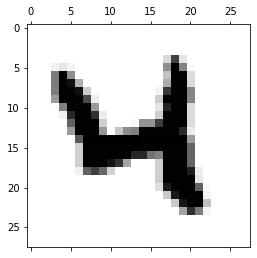

an example of a data point with label 4 before to_categorical ...
... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)
Model architecture created successfully!


In [52]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)
#
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
#
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[20], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax')) # mi traduce tutto in probabilità
    # il guess con più alta prob sarà la predizione
    
    return model

print('Model architecture created successfully!')

### Ora provo a cambiare gli optimizers
* SGD
* Adam
* RMSprop

In [26]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model(a):
    # create the model
    model=create_DNN()
    # compile the model
    if a==0:
        model.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer=SGD(),
                      metrics=['accuracy'])
    elif a==1:
        model.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer=Adam(),
                      metrics=['accuracy'])
    elif a==2:
        model.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer=RMSprop(),
                      metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


##### SGD

In [25]:
# training
# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model(0)

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 39s 654us/step - loss: 0.7563 - accuracy: 0.7780 - val_loss: 0.3097 - val_accuracy: 0.9184
Epoch 2/5
60000/60000 [==============================] - 41s 689us/step - loss: 0.3794 - accuracy: 0.8924 - val_loss: 0.2352 - val_accuracy: 0.9345
Epoch 3/5
60000/60000 [==============================] - 31s 515us/step - loss: 0.3057 - accuracy: 0.9134 - val_loss: 0.1996 - val_accuracy: 0.9409
Epoch 4/5
60000/60000 [==============================] - 34s 560us/step - loss: 0.2664 - accuracy: 0.9254 - val_loss: 0.1730 - val_accuracy: 0.9496
Epoch 5/5
60000/60000 [==============================] - 40s 673us/step - loss: 0.2330 - accuracy: 0.9344 - val_loss: 0.1542 - val_accuracy: 0.9538


10000/10000 [==============================] - 3s 273us/step

Test loss: 0.07541829464606635
Test accuracy: 0.9789000153541565


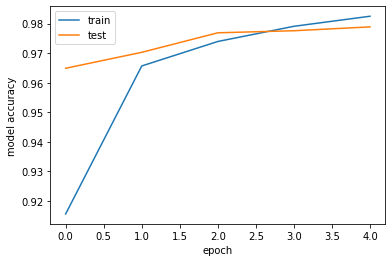

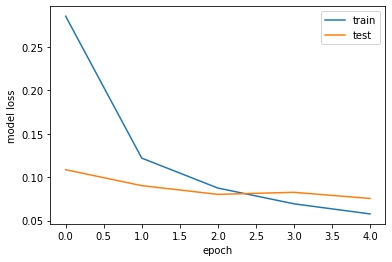

In [34]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

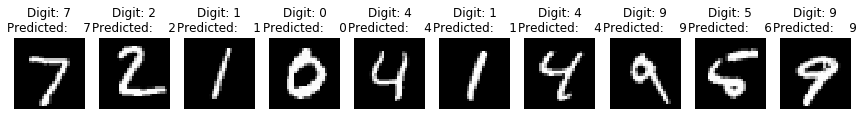

In [28]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

##### Adam

In [30]:
# ricompilare la prima casella, non la riporto per avere una migliore visualizzazione

# training
# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model(1)

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 69s 1ms/step - loss: 0.2855 - accuracy: 0.9156 - val_loss: 0.1086 - val_accuracy: 0.9649
Epoch 2/5
60000/60000 [==============================] - 59s 990us/step - loss: 0.1219 - accuracy: 0.9657 - val_loss: 0.0902 - val_accuracy: 0.9703
Epoch 3/5
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0874 - accuracy: 0.9740 - val_loss: 0.0802 - val_accuracy: 0.9769
Epoch 4/5
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0693 - accuracy: 0.9791 - val_loss: 0.0825 - val_accuracy: 0.9776
Epoch 5/5
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0576 - accuracy: 0.9825 - val_loss: 0.0754 - val_accuracy: 0.9789


10000/10000 [==============================] - 2s 190us/step

Test loss: 0.07541829464606635
Test accuracy: 0.9789000153541565


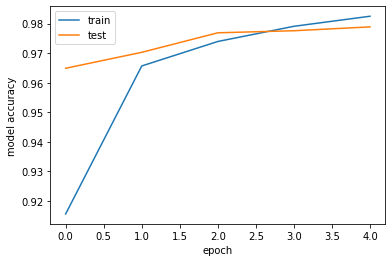

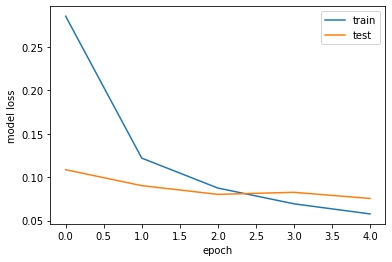

In [31]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

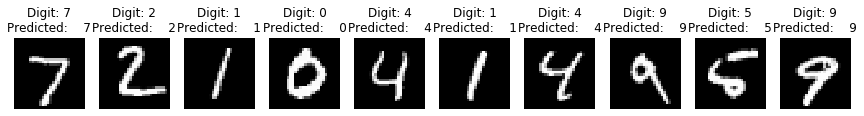

In [32]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

##### RMSprop

In [35]:
# training
# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model(2)

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 57s 949us/step - loss: 0.2817 - accuracy: 0.9177 - val_loss: 0.1168 - val_accuracy: 0.9662
Epoch 2/5
60000/60000 [==============================] - 56s 936us/step - loss: 0.1427 - accuracy: 0.9641 - val_loss: 0.1049 - val_accuracy: 0.9754
Epoch 3/5
60000/60000 [==============================] - 55s 924us/step - loss: 0.1299 - accuracy: 0.9692 - val_loss: 0.1230 - val_accuracy: 0.9732
Epoch 4/5
60000/60000 [==============================] - 54s 897us/step - loss: 0.1342 - accuracy: 0.9718 - val_loss: 0.1421 - val_accuracy: 0.9738
Epoch 5/5
60000/60000 [==============================] - 52s 874us/step - loss: 0.1332 - accuracy: 0.9742 - val_loss: 0.1509 - val_accuracy: 0.9679


10000/10000 [==============================] - 2s 192us/step

Test loss: 0.1508841855141081
Test accuracy: 0.9678999781608582


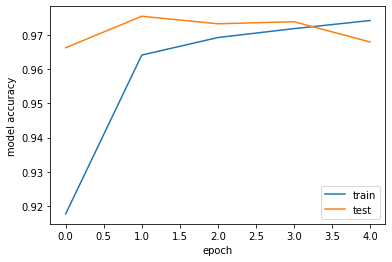

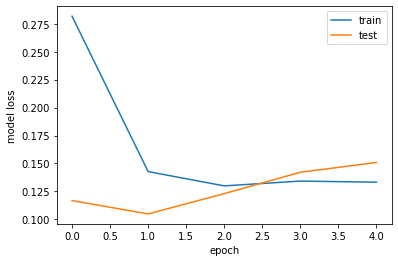

In [36]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

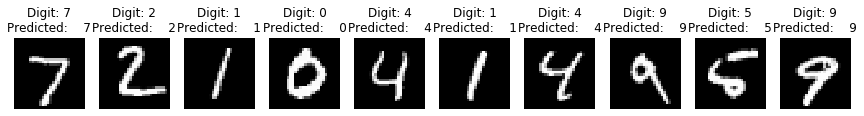

In [37]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

* SGD: il più veloce (tra i tre optimizers provati), ma all'inizio una scarsa accuratezza. Nei risultati abbiamo, infatti, una predizione sbagliata
* Adam: il più lento, ma ha fin da subito un'alta accuratezza. Le predizioni sono tutte giuste.
* RMSprop: poco più veloce di Adam, ma con un'accuratezza paragonabile (all'aumentare delle epoche la differenza aumenta favore dell'Adam). Le predizioni sono tutte giuste.





<span style="color:red">Migliorare magari il commento</span>

## <span style="color:green"> Esercizio 12.2 </span>

In [55]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D, Softmax

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [87]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 6 filters 24x24(dimensionality of output space)
    model.add(Conv2D(6, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten()) # 4x4x16=256
    model.add(Dense(256, input_shape=[1],activation='relu'))
    model.add(Dense(10, input_shape=[1]))
    model.add(Softmax(axis=-1))

    #
    # ADD HERE SOME OTHER LAYERS AT YOUR WILL, FOR EXAMPLE SOME: Dropout, 2D pooling, 2D convolutional etc. ... 
    # remember to move towards a standard flat layer in the final part of your DNN,
    # and that we need a soft-max layer with num_classes=10 possible outputs
    #
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adam',
                  metrics=['accuracy'])
    return model

In [88]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 60s 1ms/step - loss: 0.1954 - accuracy: 0.9389 - val_loss: 0.0700 - val_accuracy: 0.9775
Epoch 2/5
60000/60000 [==============================] - 56s 941us/step - loss: 0.0762 - accuracy: 0.9763 - val_loss: 0.0545 - val_accuracy: 0.9820
Epoch 3/5
60000/60000 [==============================] - 56s 927us/step - loss: 0.0556 - accuracy: 0.9828 - val_loss: 0.0554 - val_accuracy: 0.9820
Epoch 4/5
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0453 - accuracy: 0.9852 - val_loss: 0.0574 - val_accuracy: 0.9841
Epoch 5/5
10000/10000 [==============================] - 2s 220us/step

Test loss: 0.044743620696064315
Test accuracy: 0.9858999848365784



Test loss: 0.044743620696064315
Test accuracy: 0.9858999848365784


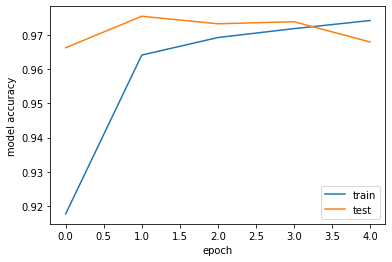

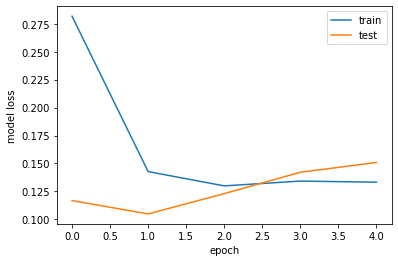

In [89]:
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

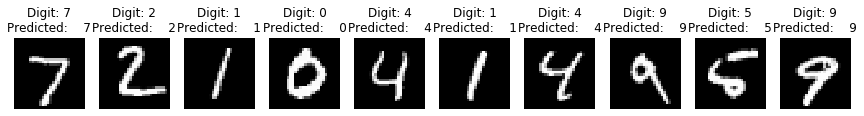

In [90]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

## <span style="color:green"> Esercizio 12.3 </span>

Image size: 28x28


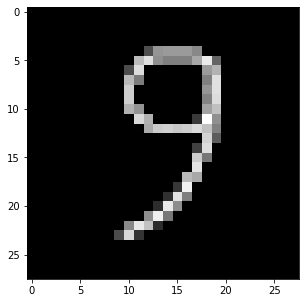

(28, 28)


In [110]:
from PIL import Image
import os

digit_filename = "numbers/number_9.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

print(data.shape)

(28, 28)
(1, 784)


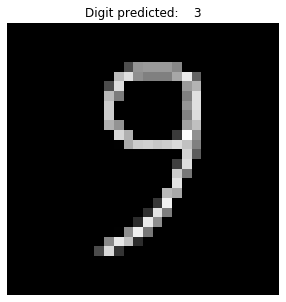

In [111]:
print(data.shape)
data = data.reshape(1,xdim*ydim)
print(data.shape)
pred_0 = model_DNN.predict(data)

data = data.reshape(xdim,ydim)

plt.figure(figsize=(5, 5))  
plt.imshow(data, cmap='gray')    
plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 
plt.show()